In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/metabric.csv') # Metabric Cancer Data
df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [2]:
# Q1
x = df['Age at Diagnosis']

# Naive double loops
def L(x):
    Z = np.sort(x.unique()) # Extract and sort unique values for x
    L = np.zeros((len(Z),len(x)))
    for j in range(len(Z)):
        for i in range(len(x)):
            L[j,i] = (x[i] <= Z[j])
    return L

L(x)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], shape=(1167, 1343))

In [3]:
# Q2
def compute_quantile(data, q=0.5):
    data = np.sort(data)
    pos = (len(data) - 1) * q
    lower = int(np.floor(pos))
    upper = int(np.ceil(pos))
    if lower == upper:
        return data[int(pos)]
    return data[lower] + (pos - lower) * (data[upper] - data[lower])

for i in [0.1, 0.25, 0.5, 0.75, 0.9]:
    print(i, compute_quantile(df['Age at Diagnosis'], i), np.percentile(df['Age at Diagnosis'], i * 100))

0.1 43.064 43.064
0.25 51.045 51.045
0.5 61.14 61.14
0.75 69.815 69.815
0.9 77.114 77.114


In [4]:
# Q3
def calc_IQR(data):
    q1 = compute_quantile(data, 0.25)
    q3 = compute_quantile(data, 0.75)
    iqr = q3 - q1
    left_whisker = q1 - 1.5 * iqr
    right_whisker = q3 + 1.5 * iqr
    return [iqr, left_whisker, right_whisker]

print (calc_IQR(df["Age at Diagnosis"]))

[np.float64(18.769999999999996), np.float64(22.890000000000008), np.float64(97.97)]


In [ ]:
# Q4
# TODO: This current snaps the whickers to the threshold
# It should snap it to the last valid data point
def five_num_summary(data):
    q1 = compute_quantile(data, 0.25)
    q3 = compute_quantile(data, 0.75)
    median = compute_quantile(data, 0.5)
    whisker_high = min(q3 + 1.5 * (q3 - q1), data.max())
    whisker_low = max(q1 - 1.5 * (q3 - q1), data.min())
    return [data.min(), whisker_low, q1, median, q3, whisker_high, data.max()]

print(five_num_summary(df["Age at Diagnosis"]))

[21.93, np.float64(22.890000000000008), np.float64(51.045), np.float64(61.14), np.float64(69.815), 96.29, 96.29]


[21.93, np.float64(22.890000000000008), np.float64(51.045), np.float64(61.14), np.float64(69.815), 96.29, 96.29]


<Axes: xlabel='Cancer Type', ylabel='Age at Diagnosis'>

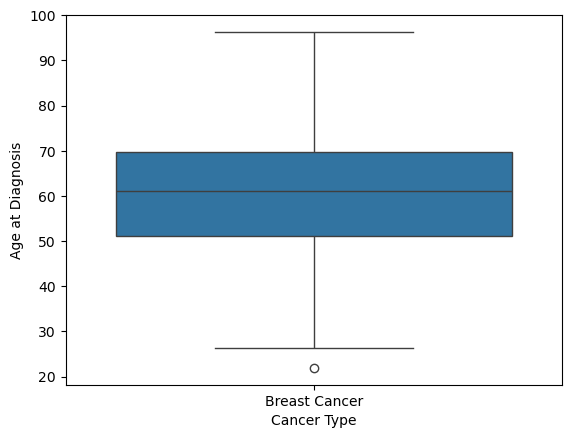

In [ ]:
# Q5
# TODO: Make the visualization for out 5 num summarry
print(five_num_summary(df["Age at Diagnosis"]))
sns.boxplot(x="Cancer Type", y="Age at Diagnosis", data=df)

In [7]:
# Q6
def find_outliers(data):
    q1 = compute_quantile(data, 0.25)
    q3 = compute_quantile(data, 0.75)
    return (data < (q1 - 1.5 * (q3 - q1))) | (data > (q3 + 1.5 * (q3 - q1)))

for a in find_outliers(df["Age at Diagnosis"]):
    print(a)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals